In [35]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io as sio
import h5py
import scipy.signal as scisig
import importlib
import analysis_utils as au
import cmath

In [36]:
filename = r'D:\Lab Data\lorentz_force\sphere20250507\20250523\2.5 V\pos0 10\tt0.hdf5'
data, attrs = au.load_data_lf(filename)
PSD = scisig.welch(data['channel_d'], fs = 1/attrs['delta_t'], nperseg = int(1/attrs['delta_t']))

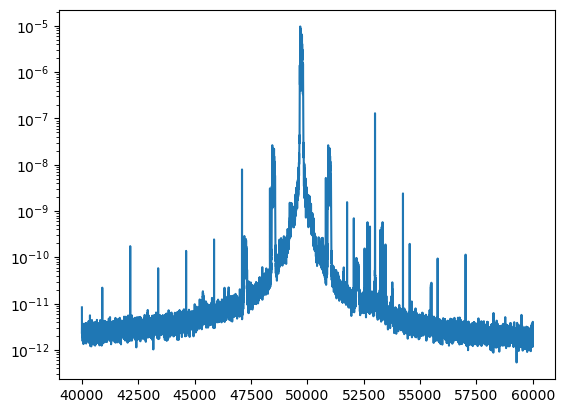

In [39]:
cal = 10**(-15)*0.75 # Matching to Yu-Han's calibration
lb = 40000
ub = 60000
plt.plot(PSD[0][lb:ub], PSD[1][lb:ub])
plt.yscale('log')

In [5]:
freqs = [5300]
numfiles = 10
int_n = 10**5
file_n = 10**7
samples_per_file = int(file_n/int_n)
positions = [0, 1, 2]
cycles = np.linspace(0, 9, 10, dtype = int)
directions = [1, 2]

phases_pos = np.zeros((len(cycles), len(directions), len(positions), len(freqs), int(numfiles*samples_per_file)))
amps_pos = np.zeros((len(cycles), len(directions), len(positions), len(freqs), int(numfiles*samples_per_file)))
cfs_pos = np.zeros((len(cycles), len(directions), len(positions), len(freqs), int(numfiles*samples_per_file)))

for cycle in cycles:
    for direction in directions:
        for position in positions:
            path = r'D:\Lab Data\lorentz_force\sphere20250507\20250523\2.5 V\pos'+str(position)+' '+str(direction)+str(cycle)+r'\tt'
            files = np.linspace(0, numfiles-1, numfiles, dtype = int)
            end = '.hdf5'
            phases2 = np.zeros((len(freqs), int(numfiles*samples_per_file)))
            amps2 = np.zeros((len(freqs), int(numfiles*samples_per_file)))
            cf2 = np.zeros((len(freqs), int(numfiles*samples_per_file)))
            for n, file in enumerate(files):
                filename = path + str(file) + end
                data, attrs = au.load_data_lf(filename)
                for i in range(samples_per_file):
                    drive = data['channel_f'][i*int_n:(i+1)*int_n]
                    drive2 = data['channel_d'][i*int_n:(i+1)*int_n]
                    fft_drive = np.fft.rfft(drive)
                    fft_drive2 = np.fft.rfft(drive2)
                    for m, freq in enumerate(freqs):
                        phase = np.unwrap([-np.pi, cmath.phase(fft_drive[freq])-cmath.phase(fft_drive2[freq])])
                        amp = np.abs(fft_drive2[freq])/np.abs(fft_drive[freq])
                        cf = np.argmax(np.abs(fft_drive2[4800:5200]))*10+48000
                        amps2[m, samples_per_file*n+i] = amp
                        phases2[m, samples_per_file*n+i] = phase[1]
                        cf2[m, samples_per_file*n+i] = cf
            phases_pos[cycle, direction-1, position] = phases2
            amps_pos[cycle, direction-1, position] = amps2
            cfs_pos[cycle, direction-1, position] = cf2

In [35]:
data_dict = {'amps': amps_pos, 'phases': phases_pos, 'cfs': cfs_pos}
filename = r'C:\Users\thoma\Documents\SIMPLE\Data\Lab data\Lorentz force\Magsweep250523.hdf5'
au.save_data_hdf5(filename, data_dict)

In [2]:
filename = r'C:\Users\thoma\Documents\SIMPLE\Data\Lab data\Lorentz force\Magsweep250523.hdf5'
data = au.load_data_hdf52(filename)
amps_pos = data['amps']
phases_pos = data['phases']
cfs_pos = data['cfs']

In [12]:
cal = 10**(-15)*0.75 # Matching to Yu-Han's calibration
cal3 = 3.1825020700030454e-10
print(amps_pos[0,0,0,0,0]*cal3)

3.3282661389472257e-12


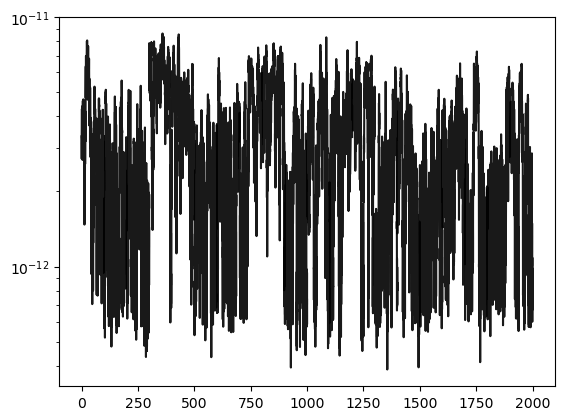

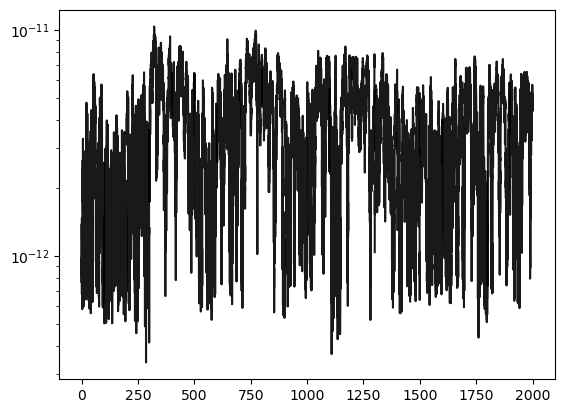

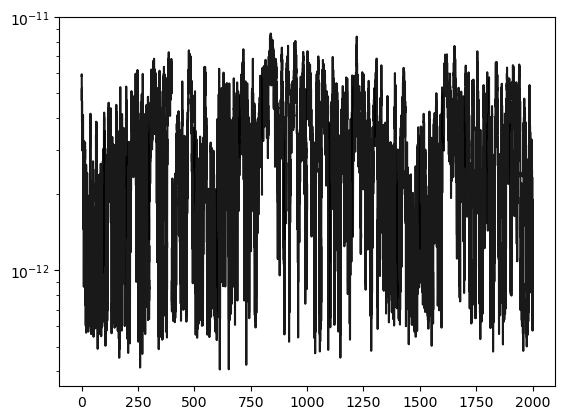

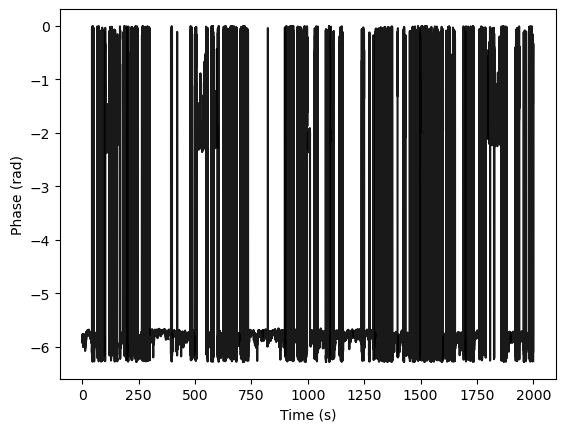

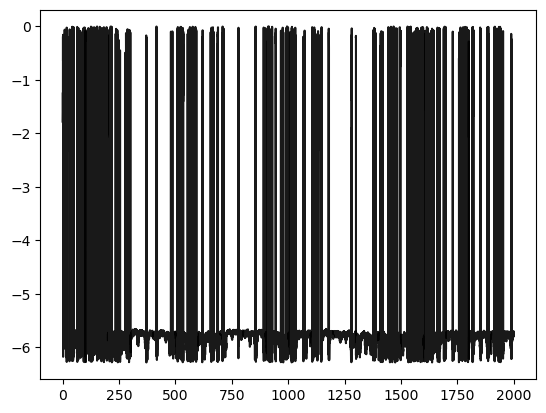

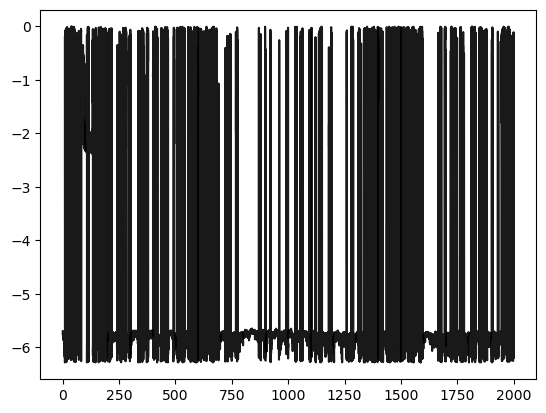

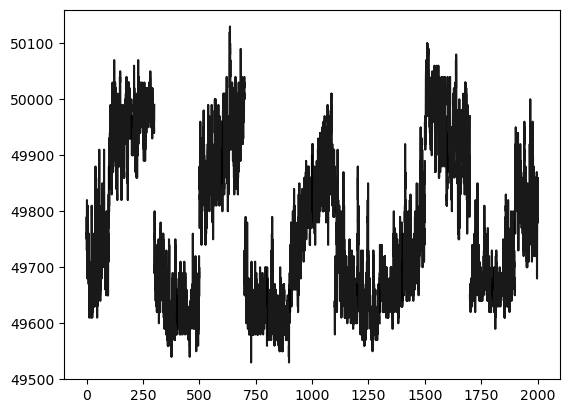

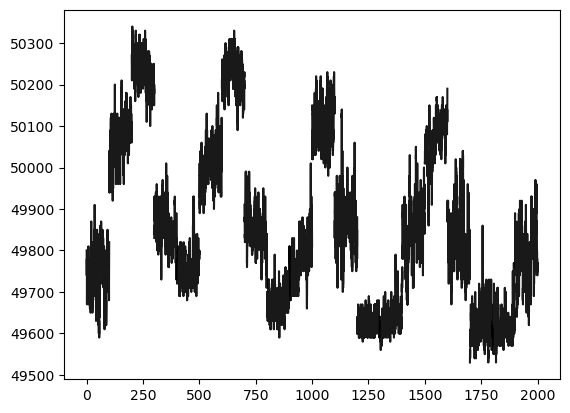

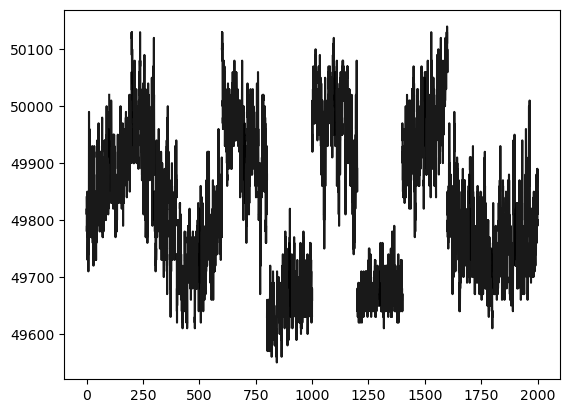

In [156]:
for m, i in enumerate(amps_pos[:,:, 0, 0].reshape((20, 1000))[:]):
    plt.plot(np.linspace(0, 99.9, 1000)+100*m, i*cal3, 'k', alpha = 0.9)
plt.yscale('log')
plt.figure()
for m, i in enumerate(amps_pos[:,:, 1, 0].reshape((20, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i*cal3, 'k', alpha = 0.9)
plt.yscale('log')
plt.figure()
for m, i in enumerate(amps_pos[:,:, 2, 0].reshape((20, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i*cal3, 'k', alpha = 0.9)
plt.yscale('log')

plt.figure()
for m, i in enumerate(phases_pos[:,:, 0, 0].reshape((20, 1000)[:])):
    plt.plot(np.linspace(0, 99.9, 1000)+100*m, i, 'k', alpha = 0.9)
plt.ylabel('Phase (rad)')
plt.xlabel('Time (s)')
plt.figure()
for m, i in enumerate(phases_pos[:,:, 1, 0].reshape((20, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i, 'k', alpha = 0.9)
plt.figure()
for m, i in enumerate(phases_pos[:,:, 2, 0].reshape((20, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i, 'k', alpha = 0.9)

plt.figure()
for m, i in enumerate(cfs_pos[:,:, 0, 0].reshape((20, 1000)[:])):
    plt.plot(np.linspace(0, 99.9, 1000)+100*m, i, 'k', alpha = 0.9)
plt.figure()
for m, i in enumerate(cfs_pos[:,:, 1, 0].reshape((20, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i, 'k', alpha = 0.9)
plt.figure()
for m, i in enumerate(cfs_pos[:,:, 2, 0].reshape((20, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i, 'k', alpha = 0.9)


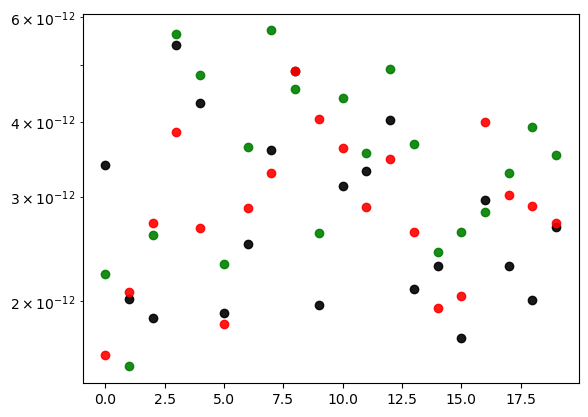

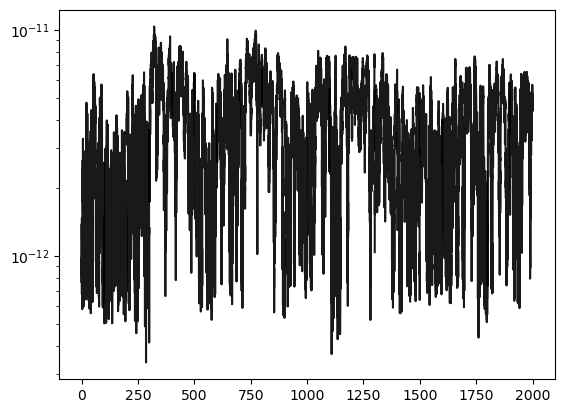

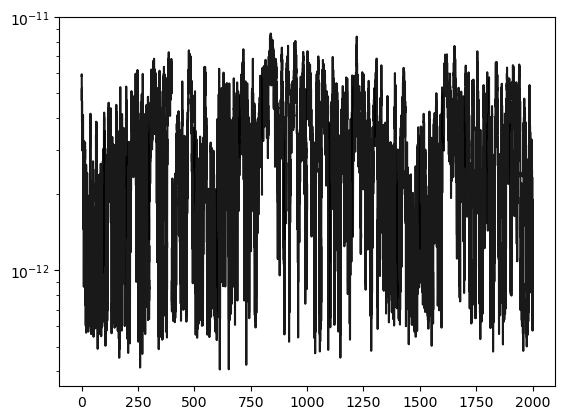

In [75]:
for m, i in enumerate(amps_pos[:,:, 0, 0].reshape((20, 1000))[:]):
    plt.plot(m, np.mean(i)*cal3, 'ko', alpha = 0.9)

for m, i in enumerate(amps_pos[:,:, 1, 0].reshape((20, 1000))[:]):
    plt.plot(m, np.mean(i)*cal3, 'go', alpha = 0.9)

for m, i in enumerate(amps_pos[:,:, 2, 0].reshape((20, 1000))[:]):
    plt.plot(m, np.mean(i)*cal3, 'ro', alpha = 0.9)
plt.yscale('log')
plt.figure()
for m, i in enumerate(amps_pos[:,:, 1, 0].reshape((20, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i*cal3, 'k', alpha = 0.9)
plt.yscale('log')
plt.figure()
for m, i in enumerate(amps_pos[:,:, 2, 0].reshape((20, 1000))):
    plt.plot(np.linspace(0, 100, 1000)+100*m, i*cal3, 'k', alpha = 0.9)
plt.yscale('log')

In [6]:
cf_rs = cfs_pos[:,:, 0, 0].reshape((20000))
amp_rs = amps_pos[:,:, 0, 0].reshape((20000))

cf_rs2 = cfs_pos[:,:, 1, 0].reshape((20000))
amp_rs2 = amps_pos[:,:, 1, 0].reshape((20000))

cf_rs3 = cfs_pos[:,:, 2, 0].reshape((20000))
amp_rs3 = amps_pos[:,:, 2, 0].reshape((20000))

In [114]:
fbound = 0

amp_mean1 = np.mean(cal3*amp_rs[cf_rs > fbound])
amp_std1 = np.std(cal3*amp_rs[cf_rs > fbound])/np.sqrt(len(amp_rs[:37000]))
print(amp_mean1, amp_std1)

amp_mean12 = np.mean(cal3*amp_rs[cf_rs > fbound]*np.abs((cf_rs[cf_rs > fbound]**2 - 55000**2))/np.abs((cf_rs[0]**2 - 55000**2)))
amp_std12 = np.std(cal3*amp_rs[cf_rs > fbound]*np.abs((cf_rs[cf_rs > fbound]**2 - 55000**2))/np.abs((cf_rs[0]**2 - 55000**2)))/np.sqrt(len(amp_rs[cf_rs > fbound]))
print(amp_mean12, amp_std12)

amp_mean2 = np.mean(cal3*amp_rs2[cf_rs2 > fbound])
amp_std2 = np.std(cal3*amp_rs2[cf_rs2 > fbound])/np.sqrt(len(amp_rs2[cf_rs2 > fbound]))
print(amp_mean2, amp_std2)

amp_mean22 = np.mean(cal3*amp_rs2[cf_rs2 >fbound]*np.abs((cf_rs2[cf_rs2 > fbound]**2 - 55000**2))/np.abs((cf_rs[0]**2 - 55000**2)))
amp_std22 = np.std(cal3*amp_rs2[cf_rs2 > fbound]*np.abs((cf_rs2[cf_rs2 > fbound]**2 - 55000**2))/np.abs((cf_rs[0]**2 - 55000**2)))/np.sqrt(len(amp_rs2[cf_rs2 > fbound]))
print(amp_mean22, amp_std22)

amp_mean3 = np.mean(cal3*amp_rs3[cf_rs3 > fbound])
amp_std3 = np.std(cal3*amp_rs3[cf_rs3 > fbound])/np.sqrt(len(amp_rs3[cf_rs3 > fbound]))
print(amp_mean3, amp_std3)

amp_mean32 = np.mean(cal3*amp_rs3[cf_rs3 > fbound]*np.abs((cf_rs3[cf_rs3 > fbound]**2 - 55000**2))/np.abs((cf_rs[0]**2 - 55000**2)))
amp_std32 = np.std(cal3*amp_rs3[cf_rs3 > fbound]*np.abs((cf_rs3[cf_rs3 > fbound]**2 - 55000**2))/np.abs((cf_rs[0]**2 - 55000**2)))/np.sqrt(len(amp_rs3[cf_rs3 > fbound]))
print(amp_mean32, amp_std32)

2.919139443814291e-12 1.2314308165710812e-14
2.9277805942600954e-12 1.2572395293587675e-14
3.5376187741756516e-12 1.3791606074199474e-14
3.4866432288724986e-12 1.3785695240317543e-14
2.950947329154567e-12 1.1703476576446463e-14
2.923980831440968e-12 1.1740716792531134e-14


In [161]:
time = np.linspace(0, 1, 1000000)
np.sqrt(2*np.mean((np.sin(2*np.pi*53000*time)+0.1*np.sin(2*np.pi*53000*time+np.pi/2))**2))

1.0049870695687857

(9e-12, 9.5e-12)

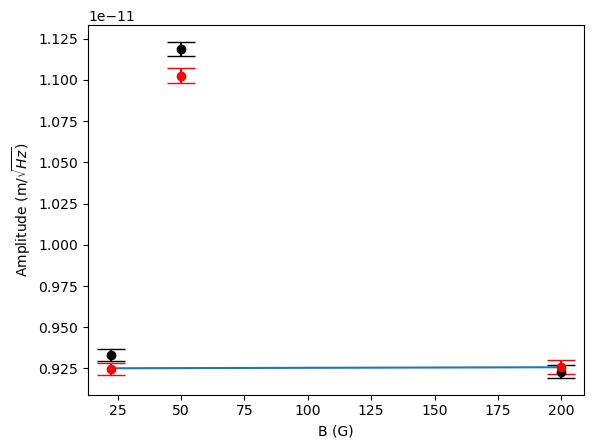

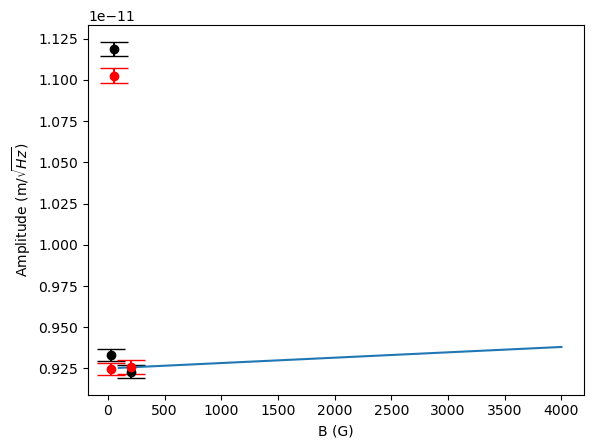

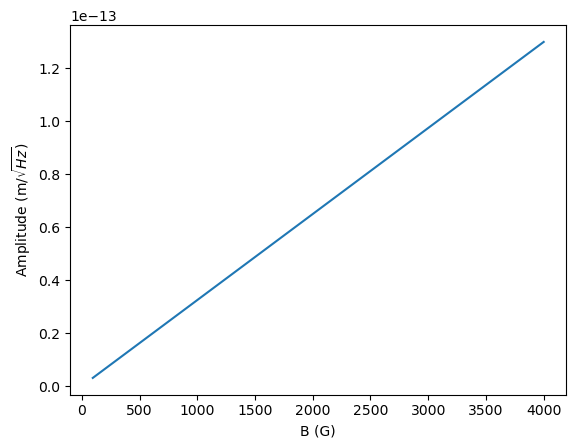

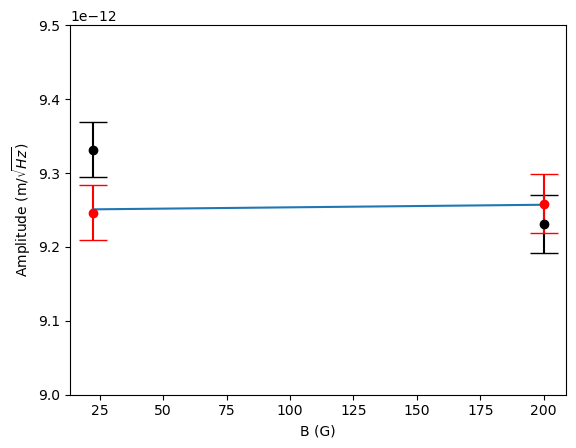

In [116]:
B = 200*np.array([1, (8/16)**2, (8/24)**2])
B2 = 200*np.linspace(1, (8/24)**2, 1000)

m1 = np.array([amp_mean1, amp_mean2, amp_mean3])
s1 = np.array([amp_std1, amp_std2, amp_std3])

m2 = np.array([amp_mean12, amp_mean22, amp_mean32])
s2 = np.array([amp_std12, amp_std22, amp_std32])

plt.errorbar(B, m1*np.sqrt(10), yerr = s1*np.sqrt(10), color = 'k', marker = 'o', linestyle = 'None', capsize = 10, label = 'Uncorrected')
plt.errorbar(B, m2*np.sqrt(10), yerr = s2*np.sqrt(10), color = 'r', marker = 'o', linestyle = 'None', capsize = 10, label = 'Corrected')
plt.plot(B2, 0.925*10**(-11)+B2*0.7*10**(-14)/200)
plt.xlabel('B (G)')
plt.ylabel('Amplitude (m/$\sqrt{Hz}$)')

B3 = 4000*np.linspace(1, (3.7/24)**2, 1000)

plt.figure()
plt.errorbar(B, m1*np.sqrt(10), yerr = s1*np.sqrt(10), color = 'k', marker = 'o', linestyle = 'None', capsize = 10, label = 'Uncorrected')
plt.errorbar(B, m2*np.sqrt(10), yerr = s2*np.sqrt(10), color = 'r', marker = 'o', linestyle = 'None', capsize = 10, label = 'Corrected')
plt.plot(B3, 0.925*10**(-11)+B3*1.3*10**(-13)/4000)
plt.xlabel('B (G)')
plt.ylabel('Amplitude (m/$\sqrt{Hz}$)')

plt.figure()
plt.plot(B3, B3*1.3*10**(-13)/4000)
plt.xlabel('B (G)')
plt.ylabel('Amplitude (m/$\sqrt{Hz}$)')

plt.figure()
plt.errorbar(B, m1*np.sqrt(10), yerr = s1*np.sqrt(10), color = 'k', marker = 'o', linestyle = 'None', capsize = 10, label = 'Uncorrected')
plt.errorbar(B, m2*np.sqrt(10), yerr = s2*np.sqrt(10), color = 'r', marker = 'o', linestyle = 'None', capsize = 10, label = 'Corrected')
plt.plot(B2, 0.925*10**(-11)+B2*0.7*10**(-14)/200)
plt.xlabel('B (G)')
plt.ylabel('Amplitude (m/$\sqrt{Hz}$)')
plt.ylim(0.9e-11, 0.95e-11)

(array([8.47457627e-06, 5.08474576e-05, 0.00000000e+00, 1.10169492e-04,
        0.00000000e+00, 2.96610169e-04, 4.06779661e-04, 0.00000000e+00,
        5.84745763e-04, 0.00000000e+00, 8.13559322e-04, 1.43220339e-03,
        0.00000000e+00, 2.06779661e-03, 0.00000000e+00, 2.89830508e-03,
        4.67796610e-03, 0.00000000e+00, 5.48305085e-03, 0.00000000e+00,
        5.82203390e-03, 0.00000000e+00, 5.77118644e-03, 4.84745763e-03,
        0.00000000e+00, 4.82203390e-03, 0.00000000e+00, 4.39830508e-03,
        4.69491525e-03, 0.00000000e+00, 4.22881356e-03, 0.00000000e+00,
        4.26271186e-03, 4.15254237e-03, 0.00000000e+00, 4.16101695e-03,
        0.00000000e+00, 4.06779661e-03, 4.33050847e-03, 0.00000000e+00,
        3.88135593e-03, 0.00000000e+00, 3.85593220e-03, 0.00000000e+00,
        3.48305085e-03, 3.57627119e-03, 0.00000000e+00, 2.72033898e-03,
        0.00000000e+00, 2.88135593e-03, 3.30508475e-03, 0.00000000e+00,
        3.53389831e-03, 0.00000000e+00, 3.16949153e-03, 3.271186

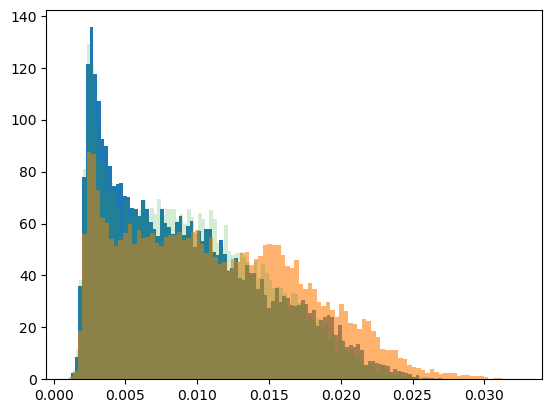

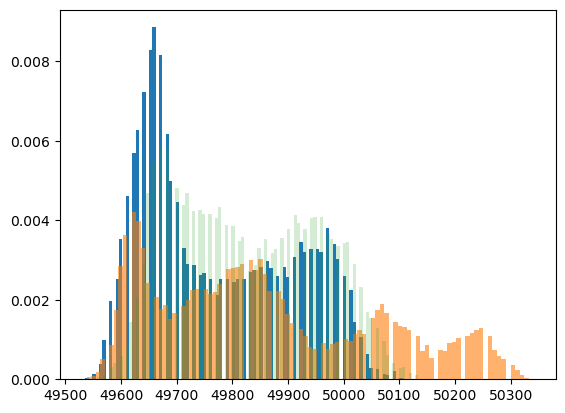

In [85]:
plt.hist(amp_rs, bins = 100, density = True, label = 'Position 0')
plt.hist(amp_rs2, bins = 100, density = True, label = 'Position 1', alpha = 0.6)
plt.hist(amp_rs3, bins = 100, density = True, label = 'Position 2', alpha = 0.2)
plt.figure()
plt.hist(cf_rs, bins = 100, density = True, label = 'Position 0')
plt.hist(cf_rs2, bins = 100, density = True, label = 'Position 1', alpha = 0.6)
plt.hist(cf_rs3, bins = 100, density = True, label = 'Position 2', alpha = 0.2)

In [153]:
phase_rs = phases_pos[:,:, 0, 0].reshape((20000))
phase_rs2 = phases_pos[:,:, 1, 0].reshape((20000))
phase_rs3 = phases_pos[:,:, 2, 0].reshape((20000))

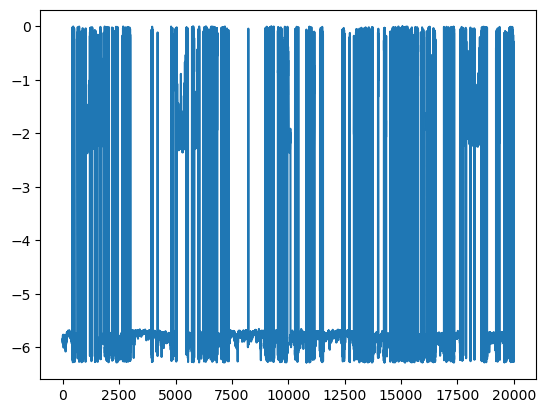

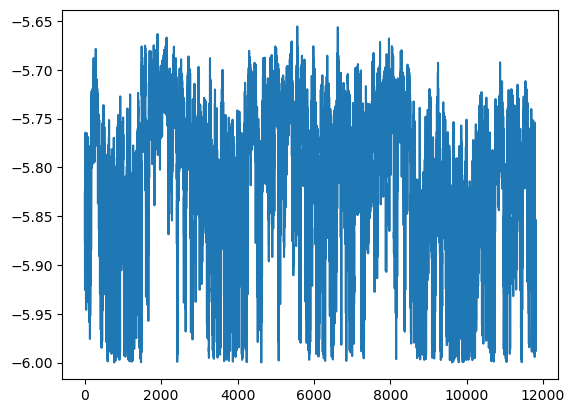

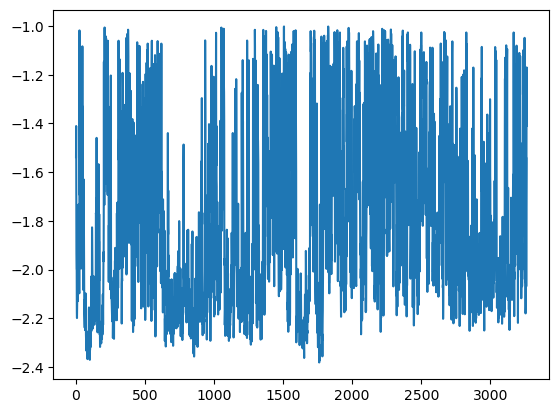

In [154]:
plt.plot(phase_rs)
plt.figure()
plt.plot(phase_rs[phase_rs>-6][phase_rs[phase_rs>-6]<-5.5])


plt.figure()
plt.plot(phase_rs[phase_rs>-3][phase_rs[phase_rs>-3]<-1])

In [26]:
phase_rs[phase_rs>-6][phase_rs[phase_rs>-6]<-5.5]

array([-5.8760027 , -5.82453155, -5.8541572 , ..., -5.85739284,
       -5.93765177, -5.98800534])

In [155]:
print(np.mean(phase_rs[phase_rs>-6][phase_rs[phase_rs>-6]<-5.5]))
print(np.mean(phase_rs2[phase_rs2>-6][phase_rs2[phase_rs2>-6]<-5.5]))
print(np.mean(phase_rs3[phase_rs3>-6][phase_rs3[phase_rs3>-6]<-5.5]))

-5.8160145659481906
-5.806171980839992
-5.820769907947037


In [56]:
amplist = []
for amp in amps_pos[:, :, 0, 0]:
    for i in amp:
        amplist.append(np.mean(i))

amplist2 = []
for amp in amps_pos[:, :, 1, 0]:
    for i in amp:
        amplist2.append(np.mean(i))

amplist3 = []
for amp in amps_pos[:, :, 2, 0]:
    for i in amp:
        amplist3.append(np.mean(i))

amplist = np.array(amplist)
amplist2 = np.array(amplist2)
amplist3 = np.array(amplist3)

amplistm = (amplist+amplist2+amplist3)/3

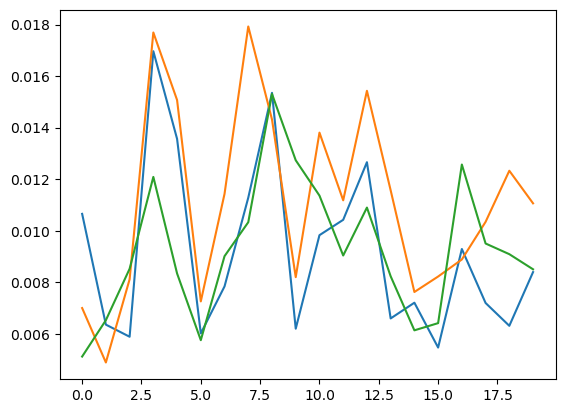

In [54]:
plt.plot(amplist)
plt.plot(amplist2)
plt.plot(amplist3)

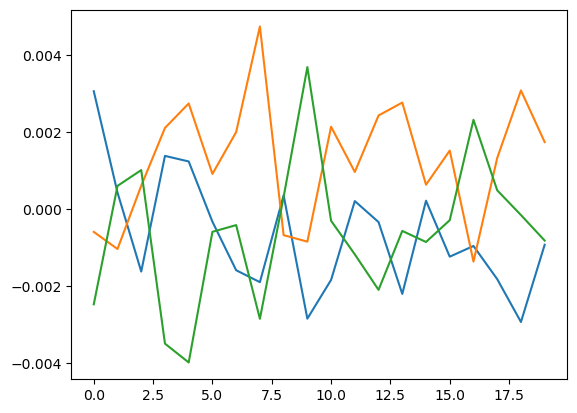

In [58]:
plt.plot(amplist - amplistm)
plt.plot(amplist2 - amplistm)
plt.plot(amplist3 - amplistm)

In [149]:
time = np.linspace(0, 1, 1000000)
fft = np.fft.rfft(np.sin(2*np.pi*53000*time)+0.0001*np.sin(2*np.pi*53000*time+np.pi/2))

fft2 = np.fft.rfft(np.sin(2*np.pi*53000*time))

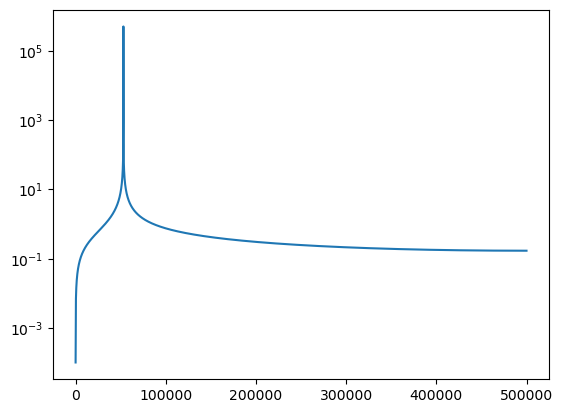

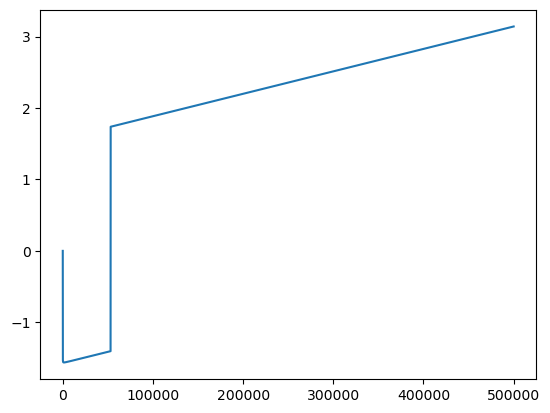

In [150]:
plt.plot(np.abs(fft))
plt.yscale('log')
plt.figure()
plt.plot([cmath.phase(i) for i in fft])

In [151]:
print(cmath.phase(fft[53000]))
print(cmath.phase(fft2[53000]))

-1.4041919160702425
-1.4042919161717817
